In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from pandas_profiling import ProfileReport
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
from sklearn.tree import DecisionTreeClassifier
import pickle

In [83]:
df=pd.read_csv('winequality_red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [84]:
x=df.drop(columns='quality')
y=df[['quality']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=30)

# COST COMPLEXITY PRUNING MODEL

In [85]:
def ccp_model(x,y):
    x=df1.drop(columns='quality')
    y=df1.quality
    dt_model1=DecisionTreeClassifier()
    dt_model1.fit(x,y)
    path=dt_model.cost_complexity_pruning_path(x,y)
    ccp_aplha=path.ccp_alphas
    dt_model2=[]
    score=[]
    for ccp in ccp_alpha:
        model=DecisionTreeClassifier(ccp_alpha=ccp)
        model.fit(x1,y1)
        dt_model2.append(model)
        score.append(model.score(x_train,y_train))
    plt.plot(score, 'r-+')
    plt.xlabel('iteration')
    plt.ylabel('score')
    fig, ax = plt.subplots()
    ax.set_xlabel("alpha")
    ax.set_ylabel("accuracy")
    ax.set_title("Accuracy vs alpha for training and testing sets")
    ax.plot(ccp_alpha, train_score, marker='o', label="train",
        drawstyle="steps-post")
    ax.plot(ccp_alpha, test_score, marker='o', label="test",
        drawstyle="steps-post")
    ax.legend()
    plt.show()

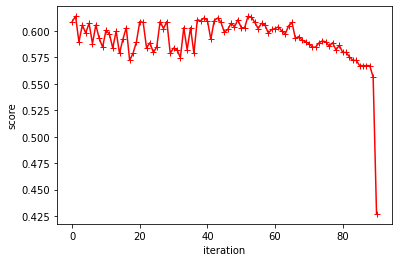

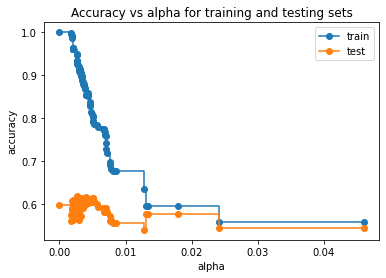

In [86]:
ccp_model(x,y)

# HYPER PARAMETER TUNNING 

In [87]:
def Hyper_Paramerter_tunning(x,y):
    dt_model = DecisionTreeClassifier(random_state=0 , ccp_alpha=.014)
    dt_model.fit(x,y)
    print('Model Score at training before Hyper_Paramerter_tunning:' ,dt_model_ccp.score(x,y))
    print('Model Score at Testing before Hyper_Paramerter_tunning :',dt_model_ccp.score(x_test,y_test))
    grid_pram = {"criterion":['gini','entropy'],
             "splitter":['best','random'],
             "max_depth" : range(2,40,1),
             "min_samples_split":range(2,10 ,1),
             "min_samples_leaf":range(1,10,1),
             'ccp_alpha':np.random.rand(20)
             }
    grid_ccp = GridSearchCV(estimator=dt_model_ccp,param_grid=grid_pram , cv = 10 , n_jobs=-1)
    grid_ccp.fit(x,y)
    print("Best Parameter for Decision Tree Classifier:\m",grid_ccp.best_params_)
    

In [93]:
# Hyper_Paramerter_tunning(x,y)

Model Score at training before Hyper_Paramerter_tunning: 0.5697310819262039
Model Score at Testing before Hyper_Paramerter_tunning : 0.5775
Best Parameter for Decision Tree Classifier:\m {'ccp_alpha': 0.07100383369258101, 'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


# Final Model TRAINING AND SCORE

In [91]:
def final_model(criterion,max_depth,min_samples_leaf,min_samples_split,splitter,ccp_alpha):
    dt_cpp_new = DecisionTreeClassifier(criterion=criterion , max_depth=max_depth ,min_samples_leaf=min_samples_leaf , min_samples_split=min_samples_split , splitter=splitter,ccp_alpha=ccp_alpha)
    dt_cpp_new.fit(x,y)
    print('Model Score at training after Hyper_Paramerter_tunning:' ,dt_cpp_new.score(x,y))
    print('Model Score at Testing after Hyper_Paramerter_tunning :',dt_cpp_new.score(x_test,y_test))


In [94]:
final_model('entropy',2,1,2,'best',0.071)

Model Score at training after Hyper_Paramerter_tunning: 0.5534709193245778
Model Score at Testing after Hyper_Paramerter_tunning : 0.5725
